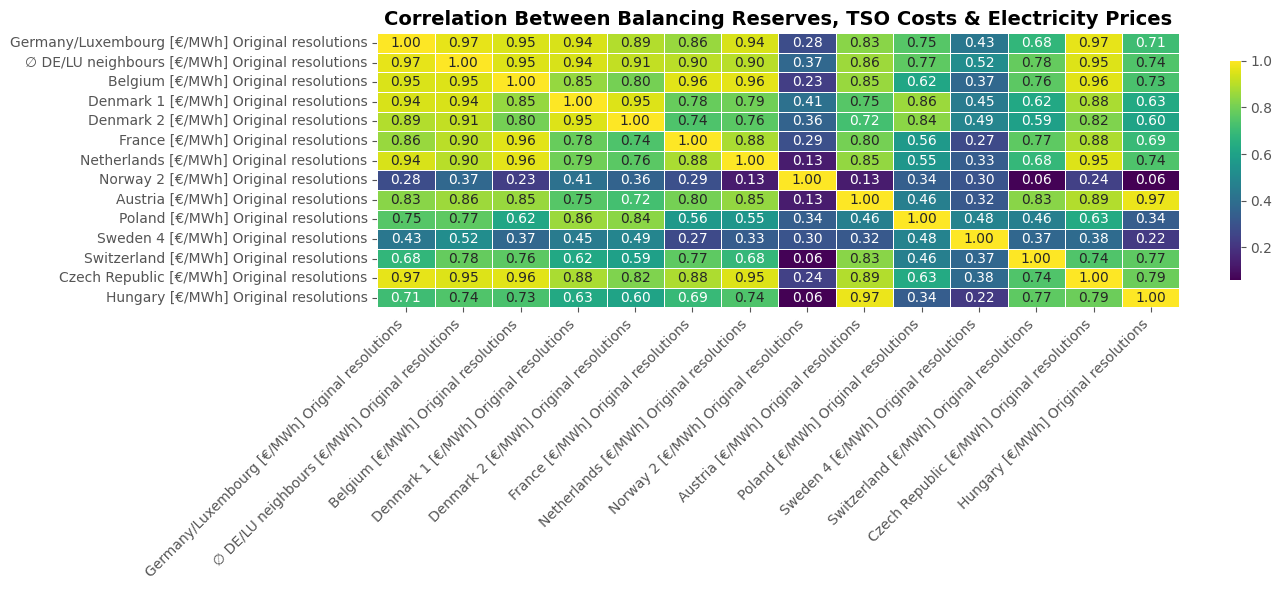

Plot saved: ../plots\correlation_balancing_reserves_tso_prices.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define paths
PLOTS_DIR = "../plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# Load datasets
balancing_reserves_file = "../data/refined_files/refined_cleaned_Balancing_energy_202301010000_202503050000_Quarterhour_Month.csv"
tso_costs_file = "../data/refined_files/refined_cleaned_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"
price_file = "../data/refined_files/refined_cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"

df_balancing = pd.read_csv(balancing_reserves_file, delimiter=",")
df_tso = pd.read_csv(tso_costs_file, delimiter=",")
df_price = pd.read_csv(price_file, delimiter=",")

# Convert time column to datetime
df_balancing["Start date"] = pd.to_datetime(df_balancing["Start date"])
df_tso["Start date"] = pd.to_datetime(df_tso["Start date"])
df_price["Start date"] = pd.to_datetime(df_price["Start date"])

# Merge datasets
df_merged = df_price.merge(df_balancing, on="Start date", how="inner").merge(df_tso, on="Start date", how="inner")

# Drop non-numeric columns before correlation
df_numeric = df_merged.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Apply seaborn style
plt.style.use("ggplot")

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="viridis", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)

# Refining plot elements
plt.title("Correlation Between Balancing Reserves, TSO Costs & Electricity Prices", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save refined figure with an improved filename
plot_filename = "correlation_balancing_reserves_tso_prices.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Plot saved: {os.path.join(PLOTS_DIR, plot_filename)}")
